# Loading dataset
We use read_csv function in pandas library to read the data and then show the dataframe to take a look of its samples and features.


In [42]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Preparation for clustering task

In [3]:
# The first five rows of dataset to take a look
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# The last five rows of dataset to take a look
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Getting the number of rows(samples) and columns(features)(The output of shape instruction is a tuple value that shows the project's dimensions)
data.shape  #(rows, columns)

(284807, 31)

In [6]:
# Checking the data types of features
# Each of features has what type of data
data_types = data.dtypes
data_types

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
# Here we calculted the number of null values
# And noticed that our dataset doesn't have any null value
num_nans = data.isnull().sum().sum()
num_nans

0

In [8]:
# If you have any null value for the variables you can see the number of them for each feature
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Checking the distribution of target variable
# Here we can see that our dataset is imbalanced
# Because the number of samples in class'1' is so less than class'0'
# We will talk abour it later
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# K-means Clustering with PCA


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


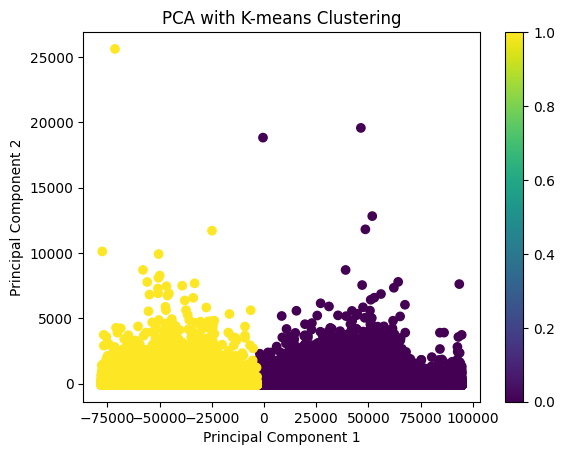

In [10]:
# Apply pca on the dataset
pca = PCA(n_components=2) 
data_pca = pca.fit_transform(data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_pca)

cluster_labels = kmeans.labels_

# Plot the clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with K-means Clustering')
plt.colorbar()

# Display the plot
plt.show()

In [11]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# K-Means Clustering

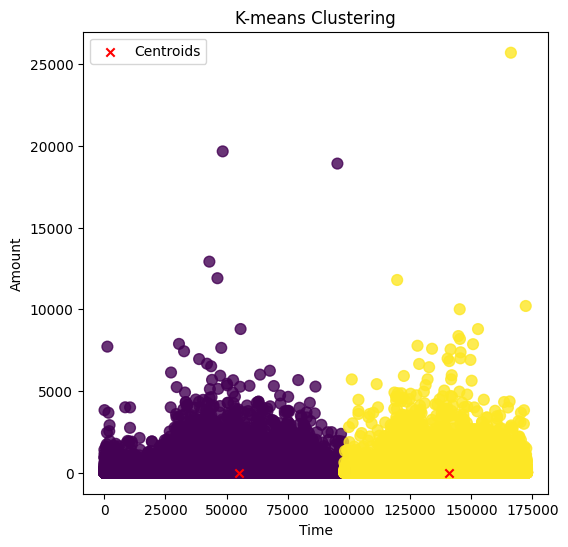

In [12]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)

# Dropping the label feature for clustering
K_data = data.drop("Class", axis=1)
kmeans.fit_predict(K_data)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# Plot the clustering results
plt.figure(figsize=(6, 6))
plt.scatter(data['Time'], data['Amount'], c=cluster_labels, cmap='viridis', s=60, alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [48]:
# Add a column Cluster to the dataset
data["Cluster"] = cluster_labels

# Calculate the number of fraud samples in each cluster
fraud_samples_in_cluster = []
for cluster in data["Cluster"].unique():
    cluster_data = data[data["Cluster"] == cluster]
    fraud_count = cluster_data["Class"].sum()
    fraud_samples_in_cluster.append(fraud_count)

# The number of fraud samples in each cluster
for cluster in data["Cluster"].unique():
    fraud_count = fraud_samples_in_cluster[cluster]
    print("Cluster {}: {} fraud samples".format(cluster, fraud_count))

Cluster 0: 330 fraud samples
Cluster 1: 162 fraud samples


In [14]:
# Calculate the number of samples in each cluster
sample_count = [sum(data["Cluster"] == cluster) for cluster in data["Cluster"].unique()]

#The number of samples in each cluster
for cluster in data["Cluster"].unique():
    count = sample_count[cluster]
    print("Cluster {}: {} samples".format(cluster, count))

Cluster 0: 153163 samples
Cluster 1: 131644 samples


In [15]:
# Calculate the percentage of frauds in each cluster
fraud_percentage = np.array(fraud_samples_in_cluster) / np.array(sample_count) * 100

# The percentage of frauds in each cluster
for cluster in data["Cluster"].unique():
    print("Percentage of frauds in cluster {}: {}".format(cluster, fraud_percentage[cluster]))

Percentage of frauds in cluster 0: 0.2154567356345854
Percentage of frauds in cluster 1: 0.12305915955151774


# Data Preparation for classification task

## Checking Imbalanced Dataset

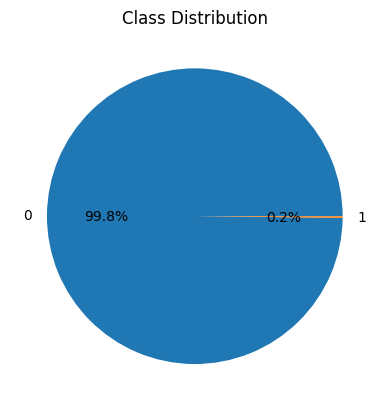

In [16]:
# Checking data distribution on "Class" feature
# Ploting the distribution
class_counts = data['Class'].value_counts()

plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

In [17]:
# We noticed that our dataset is imbalanced So we have to handle it using sampling teqhniques
# The difference between two classes is extremely large so using oversampling makes sense more(using undersampling will cause losing a lots of data)
# And this impact our classification model

## The first approach

### Use oversampling Smote
Here we first use sampling the whole data and then split the data

In [18]:
# Separate features and labels
features = data.drop(["Class", "Cluster"], axis=1)
labels = data['Class']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, labels)




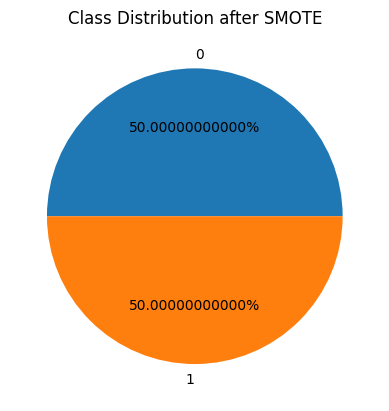

In [19]:
# Checking the dataset after applying oversampling
resampled_class_counts = pd.Series(y_resampled).value_counts()

# Plot the pie chart
plt.pie(resampled_class_counts, labels=resampled_class_counts.index, autopct='%1.11f%%')
plt.title('Class Distribution after SMOTE')
plt.show()

In [20]:
# And now we have a balanced dataset

### Split the data into test and train


In [21]:
features = data.drop(["Class", "Cluster"], axis = 1)
labels = data['Class']
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=100)

### Normalizing numerical features

In [22]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(f'X_train{x_train.shape}\n, X_test{x_test.shape}\n, y_train{y_train.shape}\n, y_test{y_test.shape}')

X_train(227845, 30)
, X_test(56962, 30)
, y_train(227845,)
, y_test(56962,)


## The second approach

### split the data into test and train set
Here we first split the data and then oversample just train set

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.20, random_state=100)

### Use oversampling Smote

In [25]:
# Oversampling the train set
oversampler = SMOTE()
X_train, Y_train = oversampler.fit_resample(X_train, Y_train)

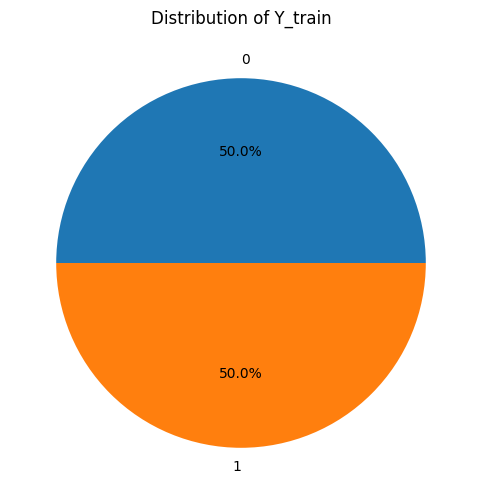

In [26]:
# Calculate the distribution of Y_train
class_counts = Y_train.value_counts()
labels = class_counts.index
counts = class_counts.values

# Plot the pie chart of Y_train
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Y_train')
plt.show()

### Normalizing numerical features

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f'X_train{X_train.shape}\n, X_test{X_test.shape}\n, Y_train{Y_train.shape}\n, Y_test{Y_test.shape}')

X_train(454898, 30)
, X_test(56962, 30)
, Y_train(454898,)
, Y_test(56962,)


### Comparison of approaches

In [28]:
# If we first oversample and then split the data, this leads to data leakage and this is not good for our model.
# So the second approach results is better for us

# Classification Algorithms

## SVM Algorithm

In [44]:
# Create an SVM classifier object
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train, Y_train)

# Predict the labels for the test set
svm_predictions = svm_classifier.predict(X_test)

# Generate the classification report
svm_classification_report = classification_report(Y_test, svm_predictions)

# Print the classification report
print("SVM Classification Report:")
print(svm_classification_report)

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.39      0.77      0.51        96

    accuracy                           1.00     56962
   macro avg       0.69      0.88      0.76     56962
weighted avg       1.00      1.00      1.00     56962



## Logistic Regression Algorithm


In [28]:
# Create a logistic regression classifier object
logreg_classifier = LogisticRegression()

# Train the logistic regression classifier
logreg_classifier.fit(X_train, Y_train)

# Predict the labels for the test set
logreg_predictions = logreg_classifier.predict(X_test)

# Generate the classification report
logreg_classification_report = classification_report(Y_test, logreg_predictions)

# Print the classification report
print("Logistic Regression Classification Report:")
print(logreg_classification_report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.83      0.26        96

    accuracy                           0.99     56962
   macro avg       0.58      0.91      0.63     56962
weighted avg       1.00      0.99      0.99     56962



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forrest Algorithm

In [40]:
# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier.fit(X_train, Y_train)

# Predict the labels for the test set
rf_predictions = rf_classifier.predict(X_test)

# Generate the classification report
rf_classification_report = classification_report(Y_test, rf_predictions)

# Print the classification report
print("Random Forest Classification Report:")
print(rf_classification_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.79      0.78      0.79        96

    accuracy                           1.00     56962
   macro avg       0.89      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962



## Decision Tree Algorithm

In [41]:
# Create a Decision Tree classifier object
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier
dt_classifier.fit(X_train, Y_train)

# Predict the labels for the test set
dt_predictions = dt_classifier.predict(X_test)

# Generate the classification report
dt_classification_report = classification_report(Y_test, dt_predictions)

# Print the classification report
print("Decision Tree Classification Report:")
print(dt_classification_report)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.40      0.74      0.52        96

    accuracy                           1.00     56962
   macro avg       0.70      0.87      0.76     56962
weighted avg       1.00      1.00      1.00     56962



## KNN Algorithm

In [43]:
# Create a KNN classifier object
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn_classifier.fit(X_train, Y_train)

# Predict the labels for the test set
knn_predictions = knn_classifier.predict(X_test)

# Generate the classification report
knn_classification_report = classification_report(Y_test, knn_predictions)

# Print the classification report
print("KNN Classification Report:")
print(knn_classification_report)

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.47      0.78      0.59        96

    accuracy                           1.00     56962
   macro avg       0.74      0.89      0.79     56962
weighted avg       1.00      1.00      1.00     56962

